In [142]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [143]:
pd.options.display.float_format = '{:20,.6f}'.format
original_data = pd.read_csv('data01/intraday.csv')

original data: (2070,)


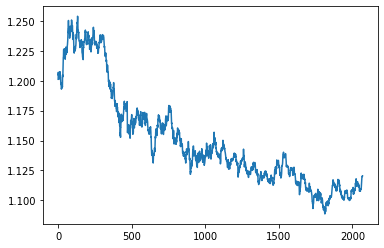

In [164]:
data = original_data['price']
print('original data: {}'.format(data.shape))
package_size=30

train_size = int(data.shape[0] * 0.90)
test_size = data.shape[0]- train_size
plt.plot(data)

In [165]:
un_norm_data = np.array(data).reshape(-1,1)
norm = MinMaxScaler(feature_range=(0,1))
norm_data = norm.fit_transform(np.array(data).reshape(-1,1))
print('norm data: {}'.format(norm_data.shape))

norm data: (2070, 1)


In [166]:
train_data, test_data = norm_data[:train_size], un_norm_data[train_size:]
print('train data: {}'.format(train_data.shape))
print('test data: {}'.format(test_data.shape))

train data: (1863, 1)
test data: (207, 1)


In [167]:
def create_dataset(dataset, time_step=package_size):
    data_x, data_y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] 
        data_x.append(a)
        data_y.append(dataset[i + time_step, 0])
    return np.array(data_x), np.array(data_y)

In [168]:
train_x, train_y = create_dataset(train_data)
test_x, test_y = create_dataset(test_data)

In [169]:
lm = LinearRegression()
lm.fit(train_x, train_y)

LinearRegression()

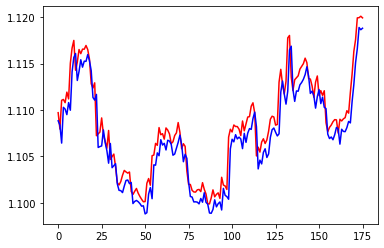

In [170]:
prediction_all = lm.predict(test_x)
plt.plot(test_y, c='r')
plt.plot(prediction_all, c='b')